# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [1]:
import praw
import pandas as pd
import credentials
import matplotlib.pyplot as plt


### Created a Reddit account

In [2]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

This code initializes a Reddit instance using the PRAW library, providing client credentials (ID and secret) and a user agent. It enables access to Reddit's API for tasks such as retrieving data, posting content, or interacting with the platform programmatically.

### Collecting data from a subreddit

In [3]:
co_subreddit = reddit.subreddit('wildlife').hot(limit=10)

In [4]:
for post in co_subreddit:
    print(post.title, post.score)

Critically endangered Right Whales are shrinking, with drastic consequences for their population 14
Death toll rises to seven in Malawi elephant relocation project linked to Prince Harry NGO 7
The Romance at Navajo Bridge - Two Critically Endangered Condors Fight to Save Their Species 8
Capturing the Beauty of Wildlife: Sleeping Polar Bear on Iceberg Wins Wildlife Photography Award 10
India snow leopards: First-ever survey puts population at 718 20
They are few. They are fat. They are Western Wyoming’s deer. 11
How does one species become many? 7
The animal sounds in most nature documentaries are made by humans – here's how they do it and why it matters 10
Australian wildlife show off puzzle skills as animal researchers investigate problem-solving 8
Colorado cuts April hunting season, electronic lures after 198 mountain lions were killed in a month 69


In [5]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('wildlife').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [6]:
co_df = pd.DataFrame(reddit_data)

In [7]:
co_df

,title,link,author,n_comments,score,text
0,Critically endangered Right Whales are shrinki...,/r/Wildlife/comments/1b2u5rb/critically_endang...,OpenEnded4802,2,12,
1,Death toll rises to seven in Malawi elephant r...,/r/Wildlife/comments/1asa66q/death_toll_rises_...,n1ght_w1ng08,0,6,
2,The Romance at Navajo Bridge - Two Critically ...,/r/Wildlife/comments/1ap2h69/the_romance_at_na...,KUHL_Clothing,1,10,
3,Capturing the Beauty of Wildlife: Sleeping Pol...,/r/Wildlife/comments/1almxqq/capturing_the_bea...,Damanjain,0,10,
4,India snow leopards: First-ever survey puts po...,/r/Wildlife/comments/1afgfry/india_snow_leopar...,n1ght_w1ng08,1,20,
...,...,...,...,...,...,...
240,Sprinklers to cool Victoria’s largest permanen...,/r/Wildlife/comments/w7ju86/sprinklers_to_cool...,bigbongtheory69,1,43,
241,"Wild tiger numbers 40% higher than thought, sa...",/r/Wildlife/comments/w55cyt/wild_tiger_numbers...,bigbongtheory69,2,148,
242,Global Tiger Numbers 40 Percent Higher Than Pr...,/r/Wildlife/comments/w5gg4e/global_tiger_numbe...,YaleE360,3,20,
243,Five wolf pups photographed in Oregon could re...,/r/Wildlife/comments/w592lf/five_wolf_pups_pho...,zsreport,0,4,


With the help of Reddit's API using the PRAW library and it fetches the top 10 hot posts from the 'wildlife' subreddit. Then iterates through each post, printing its title and score. The code attempts to convert the subreddit instance into a list, which will fail due to Reddit's API behavior. It accesses attributes of a single post, such as its score, title, and permalink. Finally, it constructs a DataFrame from the Reddit data. This DataFrame likely contains information about the posts, such as titles, scores, and other relevant metadata, organized for further analysis or visualization using the pandas library.

### Saved the data to a SQLite3 database

In [8]:
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

245

In [9]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,Critically endangered Right Whales are shrinki...,/r/Wildlife/comments/1b2u5rb/critically_endang...,OpenEnded4802,2,12,
1,Death toll rises to seven in Malawi elephant r...,/r/Wildlife/comments/1asa66q/death_toll_rises_...,n1ght_w1ng08,0,6,
2,The Romance at Navajo Bridge - Two Critically ...,/r/Wildlife/comments/1ap2h69/the_romance_at_na...,KUHL_Clothing,1,10,
3,Capturing the Beauty of Wildlife: Sleeping Pol...,/r/Wildlife/comments/1almxqq/capturing_the_bea...,Damanjain,0,10,
4,India snow leopards: First-ever survey puts po...,/r/Wildlife/comments/1afgfry/india_snow_leopar...,n1ght_w1ng08,1,20,
...,...,...,...,...,...,...
240,Sprinklers to cool Victoria’s largest permanen...,/r/Wildlife/comments/w7ju86/sprinklers_to_cool...,bigbongtheory69,1,43,
241,"Wild tiger numbers 40% higher than thought, sa...",/r/Wildlife/comments/w55cyt/wild_tiger_numbers...,bigbongtheory69,2,148,
242,Global Tiger Numbers 40 Percent Higher Than Pr...,/r/Wildlife/comments/w5gg4e/global_tiger_numbe...,YaleE360,3,20,
243,Five wolf pups photographed in Oregon could re...,/r/Wildlife/comments/w592lf/five_wolf_pups_pho...,zsreport,0,4,


The above code establishes a connection to a SQLite database named "co_reddit.sqlite" and saves the DataFrame "co_df" as a table named "posts" and then reads the data from the "posts" table into a new DataFrame "co_df_check", verifying the data integrity. Finally, it closes the database connection.

### Plotted basic EDA on the data

<AxesSubplot: ylabel='Frequency'>

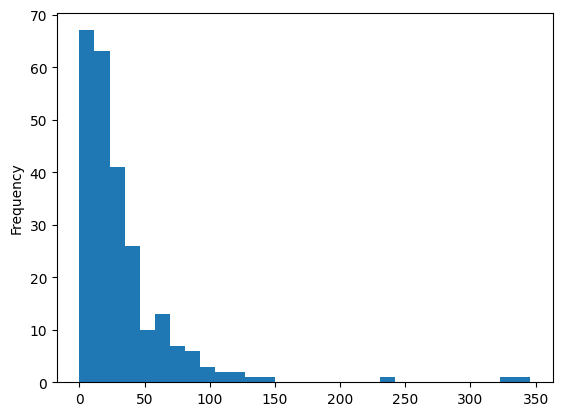

In [10]:
co_df['score'].plot.hist(bins=30)

I generated a histogram plot of the 'score' column from the DataFrame "co_df", using 30 bins to display the distribution of scores.

This code filters rows in "co_df" where the 'score' column is greater than 2000, then extracts the 'link' column values into a list.


<AxesSubplot: >

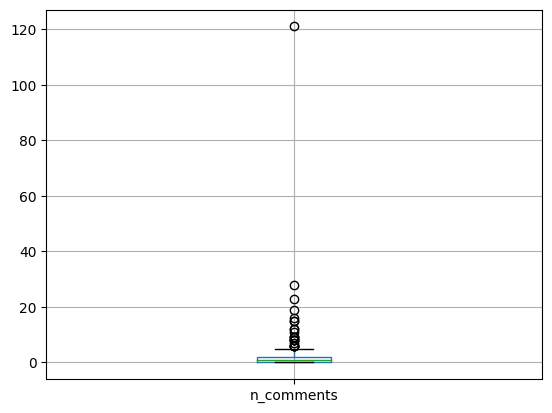

In [11]:
co_df.boxplot('n_comments')

I created a boxplot to visualize the distribution of the 'n_comments' column in the DataFrame "co_df", displaying key statistical measures such as median, quartiles, and outliers.

<AxesSubplot: >

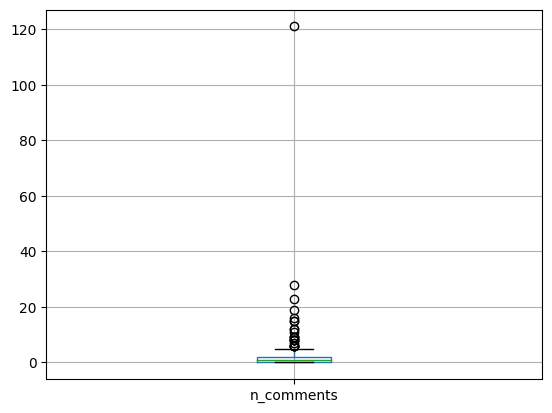

In [12]:
import matplotlib.pyplot as plt
co_df.boxplot('n_comments')


I generated a boxplot for the 'n_comments' column in the DataFrame "co_df" using matplotlib. It applies a logarithmic scale to the y-axis for better visualization.

<AxesSubplot: xlabel='score', ylabel='n_comments'>

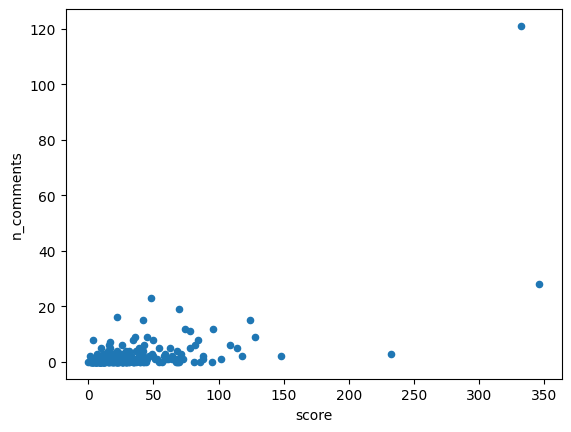

In [13]:
co_df.plot.scatter(x='score', y='n_comments')

I created a scatter plot to visualize the relationship between the 'score' and 'n_comments' columns in the DataFrame "co_df", with 'score' on the x-axis and 'n_comments' on the y-axis.

<AxesSubplot: >

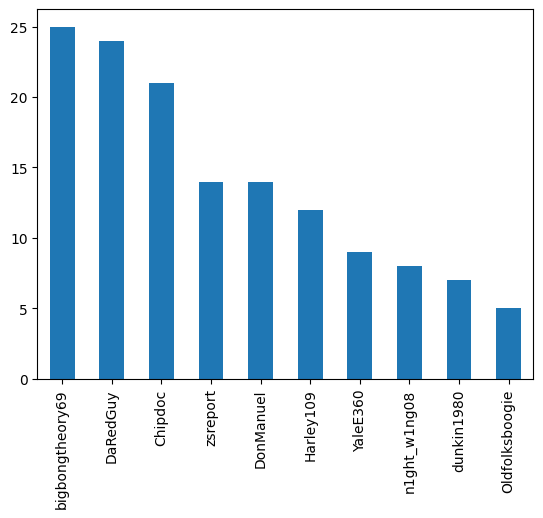

In [14]:
co_df['author'].value_counts()[:10].plot.bar()

I plotted a bar chart showing the top 10 most frequent authors in the DataFrame "co_df", based on the count of their occurrences in the 'author' column.

In [15]:
co_df[co_df['author'] == 'bigbongtheory69']

,title,link,author,n_comments,score,text
189,India reintroduces cheetahs to wild after big ...,/r/Wildlife/comments/xghfx4/india_reintroduces...,bigbongtheory69,5,78,
193,Discovered in the deep: the crustacean with ey...,/r/Wildlife/comments/xdymwe/discovered_in_the_...,bigbongtheory69,1,19,
194,Pine marten spotted in London for first time i...,/r/Wildlife/comments/x95srl/pine_marten_spotte...,bigbongtheory69,9,128,
196,Discovered in the deep: the ‘Elvis worms’ that...,/r/Wildlife/comments/x7znas/discovered_in_the_...,bigbongtheory69,1,13,
199,Discovered in the deep: the incredible fish wi...,/r/Wildlife/comments/x285zz/discovered_in_the_...,bigbongtheory69,3,49,
203,Giant panda gives birth to twin cubs in China ...,/r/Wildlife/comments/wwincs/giant_panda_gives_...,bigbongtheory69,2,39,
204,"Bird flu has killed 700 wild black vultures, s...",/r/Wildlife/comments/ww9i4f/bird_flu_has_kille...,bigbongtheory69,1,51,
213,Mine-hunting dolphins filmed hunting and eatin...,/r/Wildlife/comments/wrnkul/minehunting_dolphi...,bigbongtheory69,2,20,
215,Discovered in the deep: the mini cities of hai...,/r/Wildlife/comments/wpp05u/discovered_in_the_...,bigbongtheory69,1,19,
217,Death's-head hawk moths are able to fly perfec...,/r/Wildlife/comments/wmhewe/deathshead_hawk_mo...,bigbongtheory69,2,50,


I filtered the DataFrame "co_df" to retrieve rows where the value in the "author" column is specifically "Knightbear49".

### Summary

The above code gets information from the 'wildlife' section on Reddit using a tool called PRAW. It needs other tools like pandas to organize the data, credentials to keep login details safe, matplotlib to make graphs, and sqlite3 to work with a database.

First, it connects to Reddit using the login details provided. Then, it grabs the top 10 popular posts from the 'wildlife' section and shows their titles and scores.

Next, it sets up a special storage place (like a list) called 'reddit_data' to hold details about each post, like the title, link, who posted it, number of comments, score, and any text the post has.

The code goes through all the posts in the 'wildlife' section and collects this information into the 'reddit_data' list. It's careful to handle cases where it can't find who posted a post, so it doesn't cause any problems.

Once all the information is collected, it's put into a neat table using pandas, which makes it easier to understand and work with.

Then, it connects to a database, sort of like a digital file cabinet, named 'co_reddit.sqlite'. It stores the table of post information there. If the file already has a table with the same name, it replaces it with the new data.

To make sure the data was saved correctly, it reads the data back from the file into another table called 'co_df_check'.

After that, it makes some pictures (graphs) to help understand the data better:
1. A picture showing how popular the posts are (a histogram).
2. A picture showing how many comments each post got (a box plot).
3. A picture showing if popular posts get more comments (a scatter plot).
4. A picture showing who posts the most (a bar plot of the top 10 posters).

By looking at the pictures and data, we can learn about important issues like endangered animals, conservation efforts, and interesting facts about wildlife. This helps people who care about animals stay updated and understand what's happening in the wildlife community.